In [2]:
import sys
from pathlib import Path
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import torch

from neuralhydrology.nh_run import start_run, eval_run
from neuralhydrology.evaluation.metrics import calculate_metrics
from neuralhydrology.utils.config import Config

from sklearn.model_selection import TimeSeriesSplit

In [3]:
base_config_path = Path("../initial_exploration/1_basin.yml")
base_config = Config(base_config_path)

In [4]:
print("Original training period:", base_config.train_start_date, "to", base_config.train_end_date)
print("Original test period:", base_config.test_start_date, "to", base_config.test_end_date)

Original training period: 1981-10-01 00:00:00 to 1997-09-30 00:00:00
Original test period: 2000-10-01 00:00:00 to 2005-09-30 00:00:00


In [5]:
full_start_date = pd.to_datetime("1981-10-01")
full_end_date = pd.to_datetime("2005-09-30")
full_dates = pd.date_range(start=full_start_date, end=full_end_date, freq='D')

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

for i, (train_index, test_index) in enumerate(tscv.split(full_dates)):
    train_start, train_end = full_dates[train_index[0]], full_dates[train_index[-1]]
    test_start, test_end = full_dates[test_index[0]], full_dates[test_index[-1]]
    print(f"Fold {i+1}:")
    print(f"  Train: {train_start.date()} to {train_end.date()}")
    print(f"  Test: {test_start.date()} to {test_end.date()}")

Fold 1:
  Train: 1981-10-01 to 1985-09-30
  Test: 1985-10-01 to 1989-09-30
Fold 2:
  Train: 1981-10-01 to 1989-09-30
  Test: 1989-10-01 to 1993-09-30
Fold 3:
  Train: 1981-10-01 to 1993-09-30
  Test: 1993-10-01 to 1997-09-30
Fold 4:
  Train: 1981-10-01 to 1997-09-30
  Test: 1997-10-01 to 2001-09-30
Fold 5:
  Train: 1981-10-01 to 2001-09-30
  Test: 2001-10-01 to 2005-09-30


In [8]:
for i, (train_index, test_index) in enumerate(tscv.split(full_dates)):
    fold_num = i + 1
    print(f"\n=== Fold {fold_num} ===")

    train_start, train_end = full_dates[train_index[0]], full_dates[train_index[-1]]
    test_start, test_end = full_dates[test_index[0]], full_dates[test_index[-1]]

    fold_config_dict = base_config.as_dict().copy()

    fold_config_dict.update({
        'train_start_date': train_start.strftime('%d/%m/%Y'),
        'train_end_date': train_end.strftime('%d/%m/%Y'),
        'validation_start_date': train_end.strftime('%d/%m/%Y'),
        'validation_end_date': train_end.strftime('%d/%m/%Y'),
        'test_start_date': test_start.strftime('%d/%m/%Y'),
        'test_end_date': test_end.strftime('%d/%m/%Y'),
        'experiment_name': f"tscv_fold_{fold_num}"
    })


    fold_config = Config(fold_config_dict)

    tmp_config_file = Path(f"fold_{fold_num}_config.yml")
    fold_config.dump_config(folder=tmp_config_file.parent, filename=tmp_config_file.name)

    start_run(config_file=tmp_config_file, gpu=-1)


=== Fold 1 ===
2024-12-08 00:27:07,440: Logging to /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707/output.log initialized.
2024-12-08 00:27:07,440: ### Folder structure created at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707
2024-12-08 00:27:07,441: ### Run configurations for tscv_fold_1
2024-12-08 00:27:07,441: batch_size: 256
2024-12-08 00:27:07,441: clip_gradient_norm: 1
2024-12-08 00:27:07,442: data_dir: /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology
2024-12-08 00:27:07,442: dataset: usace
2024-12-08 00:27:07,442: device: cpu
2024-12-08 00:27:07,442: dynamic_inputs: ['MF_TuleR_S10ET-POTENTIAL', 'MF_TuleR_S10FLOW', 'MF_TuleR_S10PRECIP-INC', 'MF_TuleR_S10SATURATION FRACTION', 'MF_TuleR_S10STORAGE-SOIL', 'MF_TuleR_S10SWE-OBSERVED', 'MF_TuleR_S10TEMPERATURE-AIR', 'MF_TuleR_S20ET-POTENTIAL', 'MF_TuleR_S20FLOW', 'MF_TuleR_S20PRECIP-INC', 'MF_TuleR_S20SATURATION FRACTION', 'MF_TuleR_S20STORAGE-SOIL', 'MF_TuleR_S20SWE-OBSERV

In [12]:
run_dir = Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707")
eval_run(run_dir=run_dir, period="test")
run_dir = Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_2_0812_002750")
eval_run(run_dir=run_dir, period="test")
run_dir = Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_3_0812_002850")
eval_run(run_dir=run_dir, period="test")
run_dir = Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_4_0812_003121")
eval_run(run_dir=run_dir, period="test")
run_dir = Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_5_0812_003411")
eval_run(run_dir=run_dir, period="test")

2024-12-08 00:48:18,339: Using the model weights from /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707/model_epoch016.pt


/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
2024-12-08 00:48:18,996: Stored metrics at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707/test/model_epoch016/test_metrics.csv
2024-12-08 00:48:18,997: Stored results at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707/test/model_epoch016/test_results.p
2024-12-08 00:48:19,009: Using the model weights from /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_2_0812_002750/model_epoch016.pt


/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]
2024-12-08 00:48:19,597: Stored metrics at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_2_0812_002750/test/model_epoch016/test_metrics.csv
2024-12-08 00:48:19,597: Stored results at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_2_0812_002750/test/model_epoch016/test_results.p
2024-12-08 00:48:19,609: Using the model weights from /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_3_0812_002850/model_epoch016.pt


/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]
2024-12-08 00:48:20,215: Stored metrics at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_3_0812_002850/test/model_epoch016/test_metrics.csv
2024-12-08 00:48:20,215: Stored results at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_3_0812_002850/test/model_epoch016/test_results.p
2024-12-08 00:48:20,227: Using the model weights from /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_4_0812_003121/model_epoch016.pt


/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]
2024-12-08 00:48:20,844: Stored metrics at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_4_0812_003121/test/model_epoch016/test_metrics.csv
2024-12-08 00:48:20,845: Stored results at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_4_0812_003121/test/model_epoch016/test_results.p
2024-12-08 00:48:20,858: Using the model weights from /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_5_0812_003411/model_epoch016.pt


/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
2024-12-08 00:48:21,703: Stored metrics at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_5_0812_003411/test/model_epoch016/test_metrics.csv
2024-12-08 00:48:21,704: Stored results at /Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_5_0812_003411/test/model_epoch016/test_results.p


In [13]:
fold_run_dirs = [
    Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_1_0812_002707"),
    Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_2_0812_002750"),
    Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_3_0812_002850"),
    Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_4_0812_003121"),
    Path("/Users/canruso/Desktop/ESDL_LSTM/neuralhydrology/runs/tscv_fold_5_0812_003411")
]

results = []
best_epoch = 16  

for i, rd in enumerate(fold_run_dirs, start=1):
    test_results_file = rd / "test" / f"model_epoch{best_epoch:03d}" / "test_results.p"

    with open(test_results_file, 'rb') as fp:
        test_results = pickle.load(fp)

    basin = list(test_results.keys())[0]
    freq = list(test_results[basin].keys())[0]
    nse = test_results[basin][freq]['NSE']
    mse = test_results[basin][freq]['MSE'] if 'MSE' in test_results[basin][freq] else None

    print(f"Fold {i}: NSE={nse}, MSE={mse}")
    results.append({"fold": i, "NSE": nse, "MSE": mse})

results_df = pd.DataFrame(results)
print("\nCross-validation Results:")
print(results_df)

mean_nse = results_df["NSE"].mean()
mean_mse = results_df["MSE"].mean()
print(f"\nMean NSE across folds: {mean_nse}")
print(f"Mean MSE across folds: {mean_mse}")

Fold 1: NSE=0.6828112900257111, MSE=32156.18359375
Fold 2: NSE=-0.655285120010376, MSE=39687.2265625
Fold 3: NSE=0.7379982173442841, MSE=82451.78125
Fold 4: NSE=0.8573048561811447, MSE=23793.681640625
Fold 5: NSE=0.6229155957698822, MSE=23139.33203125

Cross-validation Results:
   fold       NSE           MSE
0     1  0.682811  32156.183594
1     2 -0.655285  39687.226562
2     3  0.737998  82451.781250
3     4  0.857305  23793.681641
4     5  0.622916  23139.332031

Mean NSE across folds: 0.4491489678621292
Mean MSE across folds: 40245.641015625


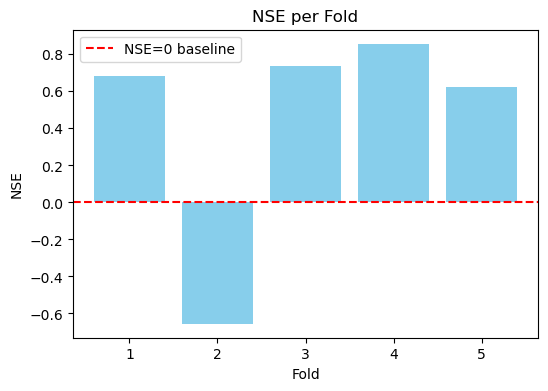

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(results_df['fold'], results_df['NSE'], color='skyblue')
ax.set_title("NSE per Fold")
ax.set_xlabel("Fold")
ax.set_ylabel("NSE")
ax.axhline(y=0, color='red', linestyle='--', label='NSE=0 baseline')
ax.legend()
plt.show()

In [15]:
results_df.to_csv("tscv_results.csv", index=False)

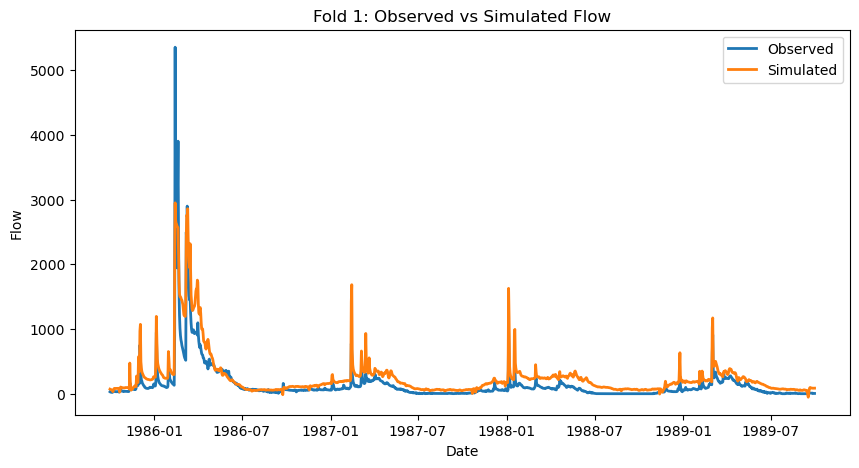

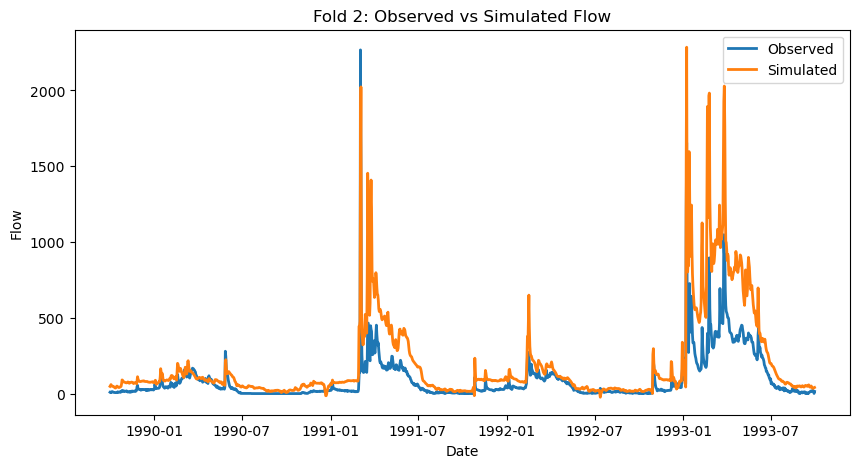

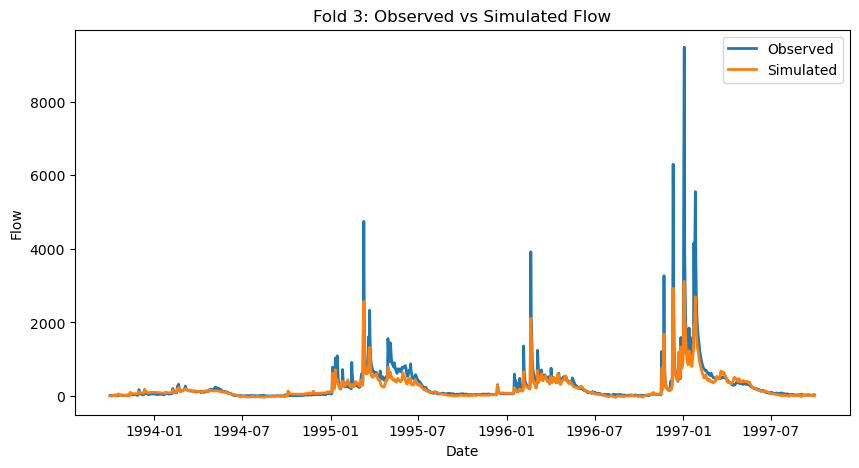

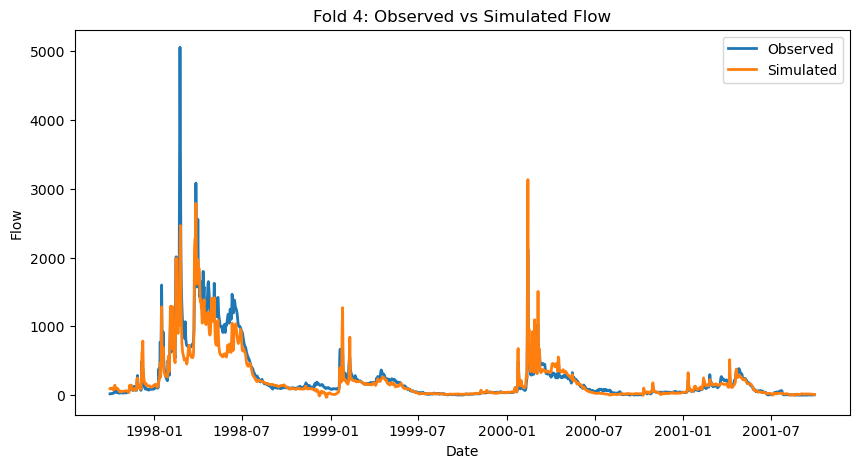

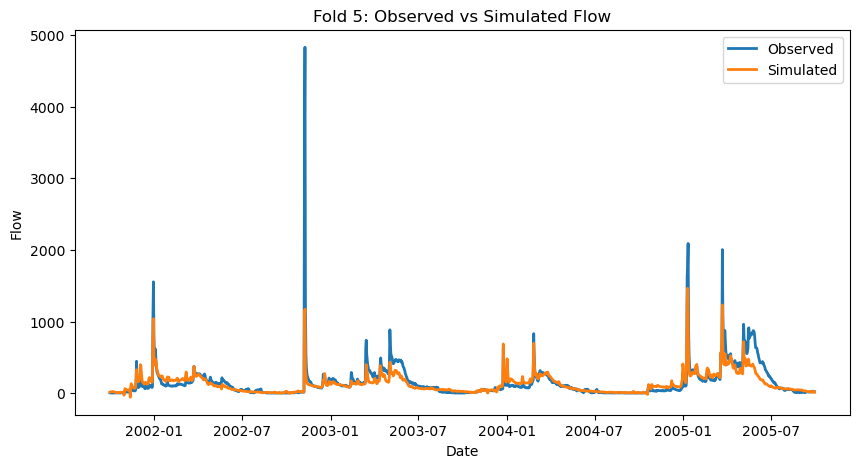

In [18]:
for i in range(1,6):
    fold_to_plot = i
    run_dir_plot = fold_run_dirs[fold_to_plot - 1]
    
    test_results_file = run_dir_plot / "test" / f"model_epoch{best_epoch:03d}" / "test_results.p"
    with open(test_results_file, 'rb') as fp:
        test_results = pickle.load(fp)
    
    basin = list(test_results.keys())[0]
    freq = list(test_results[basin].keys())[0]
    obs = test_results[basin][freq]['xr']['ReservoirInflowFLOW-OBSERVED_obs']
    sim = test_results[basin][freq]['xr']['ReservoirInflowFLOW-OBSERVED_sim']

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(obs['date'], obs, label='Observed', linewidth=2)
    ax.plot(sim['date'], sim, label='Simulated', linewidth=2)
    ax.set_title(f"Fold {fold_to_plot}: Observed vs Simulated Flow")
    ax.set_xlabel("Date")
    ax.set_ylabel("Flow")
    ax.legend()
    plt.show()

# Questions

##### Configuration of 1_basin.yml - seq_length = 365? I want to experiment TimeSeriesSplit with gap=seq_length.
##### Should I try a process of optimizing a hyperparameter? (e.g. seq_length, batch_size, learning_rate, etc.)
##### Should I try with a different yml file? Maybe one of the runs we did?